#**AutoML_H2O_on_BankChurn**

In this assignment, you will an AutoML library like H2O.ai to create predictive models and interpret them. Find a significant relation for each algorithm of your choosing in your data. Create multivariate models.

For the moment you will assume the data is good. In future assignments, you will check your data, fix data issues and do some feature engineering. 

Answer the following questions for all of the models:

* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?

#### **Abstract**
Customer churn has become a major problem in banking industry and banks have always tried to track customer interaction with the company to detect early warning signs in customer’s behavior.In this notebook we perform classification on whether a customer would be exit or not based on some factors and patterns.

#### **Variable Description**
* `customer_id` - Account Number of customer

* `credit_score` - credit score of the customer

* `country` - country of residence

* `gender` - sex of the customer

* `age` - age of the customer

* `tenure` - from how many years he/she is having bank acc in ABC Bank

* `balance` - Account Balance in customer account

* `products_number` - Number of product from bank

* `credit_card` - if the customer has credit card? 0 -if no and 1 - if yes

* `active_member` - if he/she is active member of bank ?

* `estimated_salary` - salary of account holder

* `churn` - churn status


Dataset has **10000** entries and **12** feature with 7 nominal and 5 categorical features with 20.37% Churn Failure observations or customer leaving observations.

**Numerical features** : customer_id, credit_score, tenure, age, balance, product_number, estimated salary

**Categorical features**: country , gender , credit_card , active_number , churn

In [1]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
!nvidia-smi

Wed Mar  1 03:21:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-72).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)


In [3]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 5.5 MB/s eta 0:00:00


In [4]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing H2O AutoML

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpoyth6w7r
  JVM stdout: /tmp/tmpoyth6w7r/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpoyth6w7r/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_fp8fre
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [6]:
from h2o.automl import H2OAutoML

In [7]:
df = h2o.import_file('https://raw.githubusercontent.com/sripoojitha-mandali/DataSciEnggMethodsandTools/main/csv/Bank_Customer_Churn_Prediction.csv?token=GHSAT0AAAAAAB6AWSU6RNFAAWFIG5H7TYF2Y6UOZXQ')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


The Bank Churn Dataset is placed in github and importing it as a raw file.

In [8]:
df.types # checking the data types of all the features

{'customer_id': 'int',
 'credit_score': 'int',
 'country': 'enum',
 'gender': 'enum',
 'age': 'int',
 'tenure': 'int',
 'balance': 'real',
 'products_number': 'int',
 'credit_card': 'int',
 'active_member': 'int',
 'estimated_salary': 'real',
 'churn': 'int'}

#### **Datatypes:**
* `Customer ID` - has integer values to identify a particular customer.
* `Credit Score` - has integer value to determine the creditworthiness of a customer.
* `Country` - The country where customer lives is of 'enum' datatype.
* `Gender` - The Sex of customer is of 'enum' datatype with two types **Male** and **Female**.
* `Age` - the age of customer is of 'integer' data type.
* `Tenure` - the Number of years the customer has Bank Account in that Bank is of integer datatype.
* `Balance` - Amount of money present in customer's bank is recorded in 'real' datatype.
* `Products Number` - has integer values for number of Products from that Bank.
* `Credit Card` - is a categorical value , yet represented in Integer to check if the customer own a credit card of that Bank.
* `Active Member` - is a categorical value , yet represented in Integer to check whether the customer is an active member of that Bank.
* `Estimated Salary` - Total Income of the Customer is represented as real.
* `Churn` - Churn (Loss of existing customers) of the Bank is a categorical value , yet represented in Integer.

In [9]:
# displaying top 5 rows of dataset
df.head(5)

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1.56346e+07,619,France,Female,42,2,0,1,1,1,101349,1
1.56473e+07,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
1.56193e+07,502,France,Female,42,8,159661,3,1,0,113932,1
1.57014e+07,699,France,Female,39,1,0,2,0,0,93826.6,0
1.57379e+07,850,Spain,Female,43,2,125511,1,1,1,79084.1,0


Displaying the first five records of the dataset to re-check the columns and sample data.

In [10]:
df.describe()

Rows:10000
Cols:12

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
type,int,int,enum,enum,int,int,real,int,int,int,real,int
mins,15565701.0,350.0,,,18.0,0.0,0.0,1.0,0.0,0.0,11.58,0.0
mean,15690940.569399998,650.5287999999998,,,38.9218,5.0128,76485.88928799999,1.530200000000001,0.7055,0.5151,100090.23988099996,0.2037
maxs,15815690.0,850.0,,,92.0,10.0,250898.09,4.0,1.0,1.0,199992.48,1.0
sigma,71936.1861227489,96.65329873613035,,,10.48780645170461,2.8921743770496837,62397.40520238598,0.5816543579989907,0.4558404644751334,0.49979692845891893,57510.49281769818,0.4027685839948609
zeros,0,0,,,0,413,3617,0,2945,4849,0,7963
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,15634602.0,619.0,France,Female,42.0,2.0,0.0,1.0,1.0,1.0,101348.88,1.0
1,15647311.0,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,15619304.0,502.0,France,Female,42.0,8.0,159660.8,3.0,1.0,0.0,113931.57,1.0


 
#### **Observations so far:**
* `credit_score` has a mean of 650 and 75% of data is distributed between 652 and 850, seems like a good distribution and may not have outliers.
* `age` has a mean of 38.9 years and maximum data is distributed between 37 years to 45 years, but the maximum value is 92 years which might be slightly right skewed from mean and it looks like investigation is needed to understand outliers and it will be discussed further in this notebook.
* `tenure` has a mean 5 and median is 5 and seems like a normal distribution may not have outliers.
* `balance` has mean 76485.889288 , maximum value is 250898.090000, minimum value is 0 and which is slightly left skewed from mean.
* `estimated_balance` has mean 100090.239881 and a median(2nd quantile) of 100193.915000 which is almost a normal distribution.

All the quantile information 

In [11]:
pdf = pd.read_csv("https://raw.githubusercontent.com/sripoojitha-mandali/DataSciEnggMethodsandTools/main/csv/Bank_Customer_Churn_Prediction.csv?token=GHSAT0AAAAAAB6AWSU6RNFAAWFIG5H7TYF2Y6UOZXQ")
pdf.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


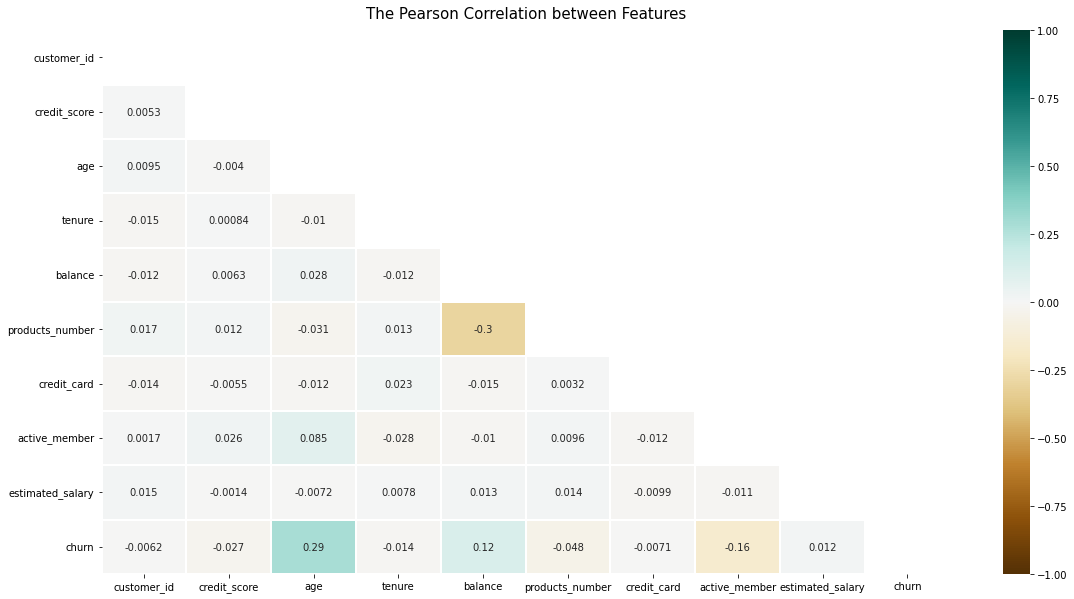

In [12]:
# For Data Visualization
import numpy as np
data_corr = pdf.corr()
mask = np.triu(np.ones_like(pdf.corr(), dtype=bool))
corr_ft = plt.figure(figsize= (19, 10))
corr_ft = sns.heatmap(data_corr, mask=mask,vmin= -1, vmax = 1, annot=True, linewidths= 0.3, cmap= "BrBG")
corr_ft.set_title("The Pearson Correlation between Features",
                   fontsize= 15,
                   pad= 12)
plt.show()

#### **Observations**
- `age` and `active_member` are slightly positively correlated. Hence we can say that older customers are more likely to churn than the younger ones.
- `balance` and `products_number` are negatively correlated.
- `churn` shows some correlation with `age` comparing to other features.

#### **Identifing predictor significance**

In [13]:
numerical_feats = pdf.select_dtypes(include='number').columns.tolist()
categorical_feats = pdf.select_dtypes(include='object').columns.tolist()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in categorical_feats:
    # Fit the label encoder to the dataframe column
    le.fit(pdf[column])
    # Replace the dataframe column with the encoded values
    pdf[column] = le.transform(pdf[column])

print(pdf)

      customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619        0       0   42       2       0.00   
1        15647311           608        2       0   41       1   83807.86   
2        15619304           502        0       0   42       8  159660.80   
3        15701354           699        0       0   39       1       0.00   
4        15737888           850        2       0   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771        0       1   39       5       0.00   
9996     15569892           516        0       1   35      10   57369.61   
9997     15584532           709        0       0   36       7       0.00   
9998     15682355           772        1       1   42       3   75075.31   
9999     15628319           792        0       0   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0         

In [14]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(pdf['churn'], pdf[['credit_score','country','gender','age','tenure','balance','products_number','credit_card','active_member','estimated_salary']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  churn   R-squared (uncentered):                   0.312
Model:                            OLS   Adj. R-squared (uncentered):              0.311
Method:                 Least Squares   F-statistic:                              452.4
Date:                Wed, 01 Mar 2023   Prob (F-statistic):                        0.00
Time:                        03:21:50   Log-Likelihood:                         -4366.4
No. Observations:               10000   AIC:                                      8753.
Df Residuals:                    9990   BIC:                                      8825.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
credit_score        -0.0002   2.62e-05     -7.048      0.000      -0.000      -0.000
country              0.0106      0.005      2.342      0.019       0.002       0.019
gender              -0.0807      0.007    -10.810      0.000      -0.095      -0.066
age                  0.0108      0.000     33.126      0.000       0.010       0.011
tenure              -0.0026      0.001     -2.070      0.039      -0.005      -0.000
balance           6.389e-07   6.18e-08     10.340      0.000    5.18e-07     7.6e-07
products_number     -0.0121      0.006     -1.902      0.057      -0.025       0.000
credit_card         -0.0075      0.008     -0.931      0.352      -0.023       0.008
active_member       -0.1449      0.008    -19.267      0.000      -0.160      -0.130
estimated_salary  3.204e-08    6.4e-08      0.501      0.617   -9.34e-08    1.57e-07
==============================================================================
Omnibus:                     1529.497   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2355.385
Skew:                           1.186   Prob(JB):                         0.00
Kurtosis:                       3.169   Cond. No.                     3.03e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### **Pointes to be noted:**
Considering the significance value of 0.05 according to the rule of thumb in statistics.

* `credit_score` has the p-value 0.00, which is lesser and hence it is a **significant** feature.
* `country` has p-value 0.019, which is lesser and hence it is a **significant** feature.
* `gender` has p-value 0.0, which is lesser and hence it is a **significant** feature.
*  `age` has the p-value 0, which is lesser and hence it is a **significant** feature.
*  `tenure` has the p-value 0.014, which is which is slightly more than the threshold value of 0.05 and hence it is a **significant** feature.
* `balance` has the p-value 0, which is lesser and hence it is a **significant** feature.
* `products_number` has the p-value 0.037, which is lesser and hence it is a **significant** feature.
* `credit_card` has the p-value 0.214, which is greater than the significant value i.e 0.05 and hence it is a **non-significant** feature.
* `active_member` has the p-value 0, which is lesser and hence it is a **significant** feature.
* `estimated_salary` has the p-value 0.747, which is greater and hence it is a **non-significant** feature.

In [15]:
df["churn"] = df["churn"].asfactor()

Converting `churn` column to enum as it is given integer but need to classify it

In [16]:
df.types

{'customer_id': 'int',
 'credit_score': 'int',
 'country': 'enum',
 'gender': 'enum',
 'age': 'int',
 'tenure': 'int',
 'balance': 'real',
 'products_number': 'int',
 'credit_card': 'int',
 'active_member': 'int',
 'estimated_salary': 'real',
 'churn': 'enum'}

`churn` converted to enum as show above

In [17]:
train,test,valid = df.split_frame(ratios=[.7, .15])

####**Splitting train test and vailidation into 70:15:15 ratio**

In [18]:
y = "churn"
x = df.columns
x.remove(y)
x.remove("customer_id")




- Here the target feature is `churn` for binary classification.
- Removing `customer_id` as customer id is just unique identifier that is randomly allocated to a customer and dont contribute for the analysis

#### **Initializes an H2O AutoML object**
The command below initializes an H2O AutoML object with specific settings to limit the number of models built, exclude certain algorithms, and control the verbosity and cross-validation settings. 

In [19]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

- Using the **H2OAutoML model** to use max of **10 models** for model slection and hyperparameter since the more the no of models we intialise , the more time it will take.
- intialising the nfold variable to 0 since **nfold** default value is 5 it will carryout 5 cross validations which is not required in our case since we already have validation set.
- Excluding **StackedEnsemble and DeepLearning** as it is more complex at this moment and it is also an expensive process

In [20]:
#check on GPU usage
!nvidia-smi

Wed Mar  1 03:21:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

0 MB of GPU used before running the train function

In [21]:
aml.train(x = x, y = y, training_frame = train, validation_frame=valid)

AutoML progress: |
03:21:53.965: Project: AutoML_1_20230301_32153
03:21:53.966: Cross-validation disabled by user: no fold column nor nfolds > 1.
03:21:53.967: Setting stopping tolerance adaptively based on the training frame: 0.011996929179144909
03:21:53.967: Build control seed: 10
03:21:53.968: training frame: Frame key: AutoML_1_20230301_32153_training_py_4_sid_8e5c    cols: 12    rows: 6948  chunks: 8    size: 158928  checksum: -3095964920021844116
03:21:53.968: validation frame: Frame key: py_6_sid_8e5c    cols: 12    rows: 1473  chunks: 8    size: 57634  checksum: -4604120136026800200
03:21:53.975: leaderboard frame: Frame key: py_6_sid_8e5c    cols: 12    rows: 1473  chunks: 8    size: 57634  checksum: -4604120136026800200
03:21:53.976: blending frame: NULL
03:21:53.976: response column: churn
03:21:53.976: fold column: null
03:21:53.976: weights column: null
03:21:54.56: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), 

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_1_20230301_32153


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    45                 45                          37452                  7            7            7             26            98            61.5778

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.07522005734191292
RMSE: 0.2742627523779212
LogLoss: 0.257513481950797
Mean Per-Class Error: 0.15661425129811848
AUC: 0.9382339298590108
AUCPR: 0.8450485517516064
Gini: 0.8764678597180215

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3209386227501398
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      5126  401   0.0726   (401.0/5527.0)
1      342   1079  0.2407   (342.0/1421.0)
Total  5468  1480  0.1069   (743.0/6948.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.320939     0.743881  205
max f2                       0.182948     0.798431  266
max f0point5                 0.489316     0.807317  144
max accuracy                 0.443437     0.902706  159
max precision                0.981596     1         0
max recall                   0.0226316    1         389
max specificity              0.981596     1         0
max absolute_mcc             0.43669      0.680961  161
max min_per_class_accuracy   0.213754     0.857143  251
max mean_per_class_accuracy  0.213754     0.858099  251
max tns                      0.981596     5527      0
max fns                      0.981596     1419      0
max fps                      0.0128822    5527      399
max tps                      0.0226316    1421      389
max tnr                      0.981596     1         0
max fnr                      0.981596     0.998593  0
max fpr                      0.0128822    1         399
max tpr                      0.0226316    1         389

Gains/Lift Table: Avg response rate: 20.45 %, avg score: 20.51 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100748                   0.947667           4.88951     4.88951            1                0.961494   1                           0.961494            0.0492611       0.0492611                  388.951   388.951            0.0492611
2        0.0200058                   0.919819           4.88951     4.88951            1                0.932237   1                           0.946971            0.0485574       0.0978184                  388.951   388.951            0.0978184
3        0.0300806                   0.895627           4.88951     4.88951            1                0.907785   1                           0.933846            0.0492611       0.14708                    388.951   388.951            0.14708
4        0.0400115                   0.868752           4.81865     4.87193            0.985507         0.879945   0.996403                    0.920468            0.0478536       0.194933                   381.865   387.193            0.194752
5        0.0500864                   0.836803           4.88951     4.87546            1                0.853956   0.997126               

####**Points Learnt:**
- Passing the input features `x` , output column `y` which is churn and training dataframe `train` and valiation dataframe `valid` as input to the train function. 
- Whenever it creates new model it updates the new leader like for `XGBoost` , `GLM`, `GBM` Gradient Boosting Model, Distributed Random Forest `DRF` and all the other models

In [22]:
#check on GPU usage after
!nvidia-smi

Wed Mar  1 03:22:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    28W /  70W |    135MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

133 MB of GPU used after running Auto Ml train function.

#### **Training the AutoML with training data** 

below, gives the leaderboard which has performance of models after training

In [23]:
lb = aml.leaderboard

In [24]:
best_model = aml.get_best_model()

Storing the best model after training on the dataset

In [25]:
print(best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_1_20230301_32153


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    45                 45                          37452                  7            7            7             26            98            61.5778

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.07522005734191292
RMSE: 0.2742627523779212
LogLoss: 0.257513481950797
Mean Per-Class Error: 0.15661425129811848
AUC: 0.9382339298590108
AUCPR: 0.8450485517516064
Gini: 0.8764678597180215

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3209386227501398
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      51

#### **Observations on best model:**
- **Gradient Boosting Machine** is the best performing model with model key *GBM_3_AutoML_12_20230227_23505*
- `age` has the highest relative_importance with respect to the target feature `churn` and followed by `product_number`
- **AUC** (Area under ROC curve )threshold is **0.95** for train data and **0.84** for validata data. 

In [26]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_2_AutoML_1_20230301_32153,0.840814,0.35057,0.685118,0.250838,0.324109,0.105047
GBM_1_AutoML_1_20230301_32153,0.838653,0.355248,0.677659,0.243871,0.326122,0.106355
GBM_3_AutoML_1_20230301_32153,0.83744,0.355582,0.674908,0.227979,0.327351,0.107158
XGBoost_3_AutoML_1_20230301_32153,0.836489,0.359068,0.671845,0.226253,0.327843,0.107481
XGBoost_1_AutoML_1_20230301_32153,0.832575,0.367212,0.660426,0.23412,0.331048,0.109593
DRF_1_AutoML_1_20230301_32153,0.832353,0.473767,0.645935,0.253987,0.334753,0.11206
GBM_4_AutoML_1_20230301_32153,0.83229,0.365352,0.659219,0.244187,0.332535,0.110579
XGBoost_2_AutoML_1_20230301_32153,0.824679,0.380166,0.65163,0.24657,0.335518,0.112572
XRT_1_AutoML_1_20230301_32153,0.818124,0.382477,0.62523,0.275179,0.342126,0.117051
GLM_1_AutoML_1_20230301_32153,0.773598,0.425128,0.456781,0.309574,0.367096,0.134759



#### **Observations** :
- Displaying top models in leaderboard 
- **GBM_3_AutoML** is the top performing model based on AUC with 0.84 metric value.

Using best model from leader board to predict on test data

In [27]:
pred=aml.leader.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [28]:
aml.leader.model_performance(test)  #Checking the best model performance on test data , this is same as using best model above

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.09260386556648573
RMSE: 0.30430883254760405
LogLoss: 0.31072771968363866
Mean Per-Class Error: 0.21453473583409394
AUC: 0.8824370695115688
AUCPR: 0.746798533375117
Gini: 0.7648741390231375

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36128207195451145
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      1172  89   0.0706   (89.0/1261.0)
1      114   204  0.3585   (114.0/318.0)
Total  1286  293  0.1286   (203.0/1579.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.361282     0.667758  162
max f2                       0.12944      0.712442  278
max f0point5                 0.594977     0.746562  95
max accuracy                 0.491275     0.882204  120
max precision                0.964862     1         0
max recall                   0.0269359    1         382
max specificity              0.964862     1         0
max absolute_mcc             0.475982     0.601923  125
max min_per_class_accuracy   0.191881     0.788263  241
max mean_per_class_accuracy  0.241937     0.802814  213
max tns                      0.964862     1261      0
max fns                      0.964862     315       0
max fps                      0.0118215    1261      399
max tps                      0.0269359    318       382
max tnr                      0.964862     1         0
max fnr                      0.964862     0.990566  0
max fpr                      0.0118215    1         399
max tpr                      0.0269359    1         382

Gains/Lift Table: Avg response rate: 20.14 %, avg score: 20.90 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010133                    0.942646           4.96541   4.96541            1                0.953714   1                           0.953714            0.0503145       0.0503145                  396.541   396.541            0.0503145
2        0.020266                    0.907595           4.96541   4.96541            1                0.930652   1                           0.942183            0.0503145       0.100629                   396.541   396.541            0.100629
3        0.030399                    0.88934            4.65507   4.86196            0.9375           0.897713   0.979167                    0.927359            0.0471698       0.147799                   365.507   386.196            0.147006
4        0.040532                    0.86534            4.96541   4.88782            1                0.875763   0.984375                    0.91446             0.0503145       0.198113                   396.541   388.782            0.19732
5        0.0500317                   0.833305           4.30335   4.77685            0.866667         0.848328   0.962025                    0.901904            0.0408805       0.238994                   330.335   377.685            0.236615
6        0.100063                    0.643635           3.95976   4.3683             0.797468         0.74287    0.879747                    0.822387            0.198113        0.437107                   295.976   336.83             0.42204
7        0.150095                    0.458257           2.70269   3.8131             0.544304         0.537494   0.767932                    0.727422            0.13522         0.572327                   170.269   281.31             0.528711
8        0.200127                    

#### **Metric Result:**
- MSE: 0.1029766324209348
- RMSE: 0.32089972331077943
- LogLoss: 0.34328028446655307
- Mean Per-Class Error: 0.22219085018539914
- AUC: 0.84313245305959
- AUCPR: 0.6703400387028092
- Gini: 0.6862649061191799


**Here AUC score is close to '1'. This means it is able to separate classes well.**

In [29]:
aml.leader.model_performance(valid) # model performance on validation data

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.10504678849807957
RMSE: 0.3241092230993737
LogLoss: 0.35057010172480646
Mean Per-Class Error: 0.2508382121947737
AUC: 0.8408139368841925
AUCPR: 0.6851178073569277
Gini: 0.681627873768385

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41656036077815434
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      1106  69   0.0587   (69.0/1175.0)
1      132   166  0.443    (132.0/298.0)
Total  1238  235  0.1365   (201.0/1473.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.41656      0.622889  143
max f2                       0.143834     0.687711  270
max f0point5                 0.552427     0.685072  104
max accuracy                 0.494119     0.86558   119
max precision                0.978497     1         0
max recall                   0.0198449    1         392
max specificity              0.978497     1         0
max absolute_mcc             0.420251     0.547728  142
max min_per_class_accuracy   0.181396     0.775168  245
max mean_per_class_accuracy  0.203076     0.777942  233
max tns                      0.978497     1175      0
max fns                      0.978497     297       0
max fps                      0.0140504    1175      399
max tps                      0.0198449    298       392
max tnr                      0.978497     1         0
max fnr                      0.978497     0.996644  0
max fpr                      0.0140504    1         399
max tpr                      0.0198449    1         392

Gains/Lift Table: Avg response rate: 20.23 %, avg score: 20.58 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101833                   0.953322           4.94295   4.94295            1                0.960324   1                           0.960324            0.0503356       0.0503356                  394.295   394.295            0.0503356
2        0.0203666                   0.924915           4.94295   4.94295            1                0.939533   1                           0.949929            0.0503356       0.100671                   394.295   394.295            0.100671
3        0.0305499                   0.895574           4.94295   4.94295            1                0.910428   1                           0.936762            0.0503356       0.151007                   394.295   394.295            0.151007
4        0.0400543                   0.860701           4.23682   4.7754             0.857143         0.881631   0.966102                    0.92368             0.0402685       0.191275                   323.682   377.54             0.189573
5        0.0502376                   0.809729           3.2953    4.47538            0.666667         0.838151   0.905405                    0.906343            0.033557        0.224832                   229.53    347.538            0.218875
6        0.100475                    0.607618           3.60702   4.0412             0.72973          0.713387   0.817568                    0.809865            0.181208        0.40604                    260.702   304.12             0.383062
7        0.150034                    0.431607           2.43762   3.51151            0.493151         0.514205   0.710407                    0.712203            0.120805        0.526846                   143.762   251.151            0.472378
8        0.200272                   

- MSE: 0.10767991858594855
- RMSE: 0.32814618478042457
- LogLoss: 0.3561277328975852
- Mean Per-Class Error: 0.24791752326130326
- AUC: 0.8419551169791017
- AUCPR: 0.6809326075386171
- Gini: 0.6839102339582035

**Here AUC score is close to '1'. This means it is able to separate classes well.**

In [30]:
perf = aml.leader.model_performance(test)
perf.accuracy()

[[0.49127538981492663, 0.8822039265357822]]

#### **Fetching all the model_ids**





In [31]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [32]:
model_ids

['GBM_2_AutoML_1_20230301_32153',
 'GBM_1_AutoML_1_20230301_32153',
 'GBM_3_AutoML_1_20230301_32153',
 'XGBoost_3_AutoML_1_20230301_32153',
 'XGBoost_1_AutoML_1_20230301_32153',
 'DRF_1_AutoML_1_20230301_32153',
 'GBM_4_AutoML_1_20230301_32153',
 'XGBoost_2_AutoML_1_20230301_32153',
 'XRT_1_AutoML_1_20230301_32153',
 'GLM_1_AutoML_1_20230301_32153']

In [33]:
best_model.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_2_AutoML_1_20230301_32153',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_2_AutoML_1_20230301_32153'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20230301_32153_training_py_4_sid_8e5c',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20230301_32153_training_py_4_sid_8e5c'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20230301_32153_training_py_4_sid_8e5c',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20230301_32153_training_py_4_sid_8e5c'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<

- the above H2O paramters give too much information which cannot be understood easily.
- It can be understood by converting H2O param to GBM param.



In [34]:
best_model.confusion_matrix()

,0,1,Error,Rate
0,5126.0,401.0,0.0726,(401.0/5527.0)
1,342.0,1079.0,0.2407,(342.0/1421.0)
Total,5468.0,1480.0,0.1069,(743.0/6948.0)


#### **Observation** : 
- The matrix shows that out of the total 6997 instances in the dataset, the model correctly predicted 5061 instances as 0 (TN) and 1062 instances as 1 (TP). However, it incorrectly predicted 524 instances as 1 when they were actually 0 (FP), and 350 instances as 0 when they were actually 1 (FN).

- The error rate is the proportion of incorrect predictions, and in this case, it is calculated as the sum of false positives and false negatives divided by the total number of instances. So, the error rate for this model is 12.49% (874/6997).

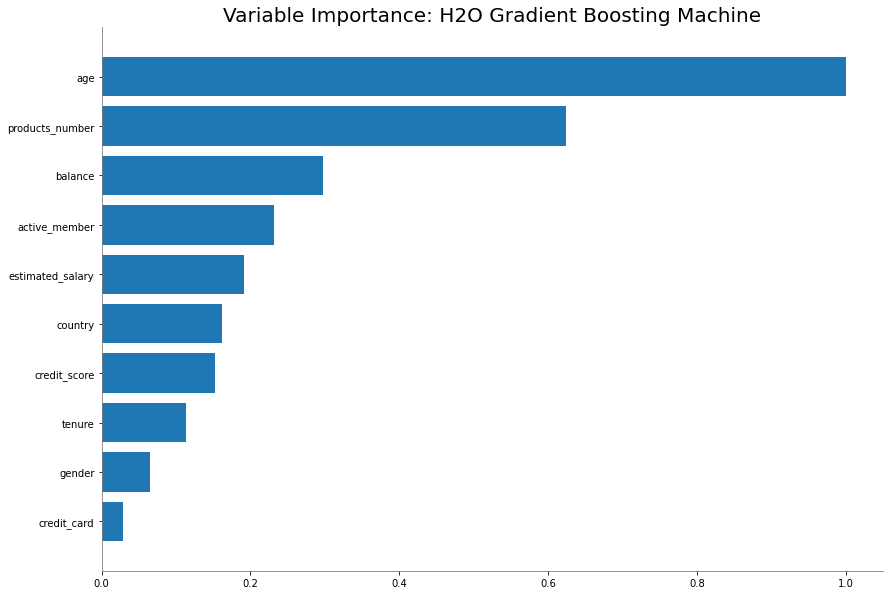

<Figure size 432x288 with 0 Axes>

In [35]:
best_model.varimp_plot()

* `age` has higher variable importance to determine the churn value if the customer exists or not.
- followed by `product_number` and `balance` 

### Questions and Answers 

1. **Is the relationship significant?**

A relationship is said to be statistically significant when the p value for the variables is less than 0.05.P.
As per predictor signficance, all the features are significant except `credit_score` and `estimated_salary`. 

Also, visualised a pearson correlation heatmap for correlation before one hot encoding

- `age` and `active_member` are slightly positively correlated with the target feature `churn`. 
- `balance` and `products_number` are negatively correlated i.e for certain `product_number` the balance is low and vice-versa.
- `churn` shows highest correlation with `age` comparing to other features i.e higher the age then higher the chances of them exiting the bank.


2. **Are any model assumptions violated?**

There are four assumptions associated with a linear regression model:

- Linearity: The relationship between X and the mean of Y is linear.
- Homoscedasticity: The variance of residual is the same for any value of X
- Independence: Observations are independent of each other.
- Normality: For any fixed value of X, Y is normally distributed.



In [36]:
best_model.model_performance()

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.07522005734191292
RMSE: 0.2742627523779212
LogLoss: 0.257513481950797
Mean Per-Class Error: 0.15661425129811848
AUC: 0.9382339298590108
AUCPR: 0.8450485517516064
Gini: 0.8764678597180215

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3209386227501398
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      5126  401   0.0726   (401.0/5527.0)
1      342   1079  0.2407   (342.0/1421.0)
Total  5468  1480  0.1069   (743.0/6948.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.320939     0.743881  205
max f2                       0.182948     0.798431  266
max f0point5                 0.489316     0.807317  144
max accuracy                 0.443437     0.902706  159
max precision                0.981596     1         0
max recall                   0.0226316    1         389
max specificity              0.981596     1         0
max absolute_mcc             0.43669      0.680961  161
max min_per_class_accuracy   0.213754     0.857143  251
max mean_per_class_accuracy  0.213754     0.858099  251
max tns                      0.981596     5527      0
max fns                      0.981596     1419      0
max fps                      0.0128822    5527      399
max tps                      0.0226316    1421      389
max tnr                      0.981596     1         0
max fnr                      0.981596     0.998593  0
max fpr                      0.0128822    1         399
max tpr                      0.0226316    1         389

Gains/Lift Table: Avg response rate: 20.45 %, avg score: 20.51 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100748                   0.947667           4.88951     4.88951            1                0.961494   1                           0.961494            0.0492611       0.0492611                  388.951   388.951            0.0492611
2        0.0200058                   0.919819           4.88951     4.88951            1                0.932237   1                           0.946971            0.0485574       0.0978184                  388.951   388.951            0.0978184
3        0.0300806                   0.895627           4.88951     4.88951            1                0.907785   1                           0.933846            0.0492611       0.14708                    388.951   388.951            0.14708
4        0.0400115                   0.868752           4.81865     4.87193            0.985507         0.879945   0.996403                    0.920468            0.0478536       0.194933                   381.865   387.193            0.194752
5        0.0500864                   0.836803           4.88951     4.87546            1                0.853956   0.997126                    0.907089            0.0492611       0.244194                   388.951   387.546            0.244013
6        0.100029                    0.628611           4.43861     4.65735            0.907781         0.736091   0.952518                    0.821713            0.221675        0.465869                   343.861   365.735            0.459898
7        0.150115                    0.445679           3.20347     4.17226            0.655172         0.532451   0.853308                    0.7252              0.16045         0.626319                   220.347   317.226            0.598637
8        0.

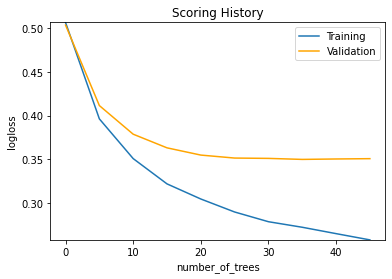

In [37]:
best_model.plot()

In [38]:

import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import seaborn as sns
df_dp=pd.read_csv("https://raw.githubusercontent.com/sripoojitha-mandali/DataSciEnggMethodsandTools/main/csv/Bank_Customer_Churn_Prediction.csv?token=GHSAT0AAAAAAB6AWSU6RNFAAWFIG5H7TYF2Y6UOZXQ")

def diagnostic_plots(df, variable):
    
    plt.figure(figsize=(20, 9))

    plt.subplot(1, 3, 1)
    sns.histplot(data = df_dp, x=variable, bins=30, kde=True)
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')
    
    plt.show()

In [39]:
#num_columns=pdf[['customer_id','credit_score','country','gender','age','tenure','balance','products_number','credit_card','active_member','estimated_salary']].columns
num_columns=df_dp[['customer_id','credit_score','age','tenure','balance','products_number','credit_card','active_member','estimated_salary']].columns
num_columns

Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary'],
      dtype='object')

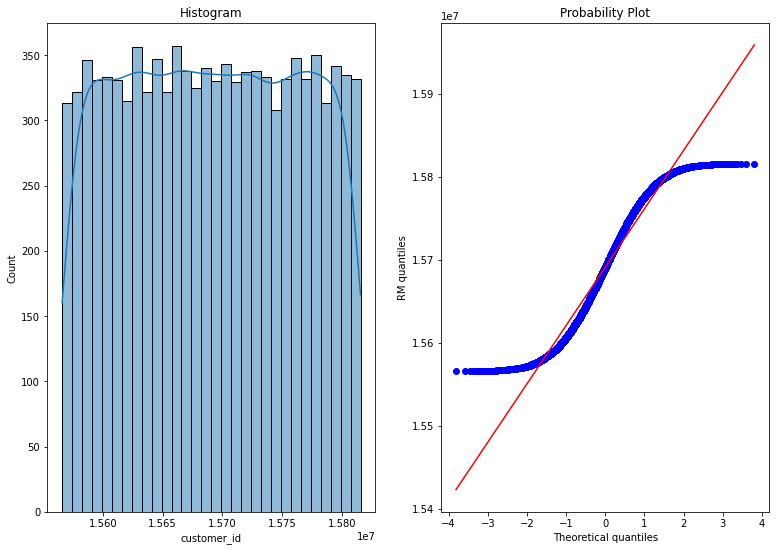

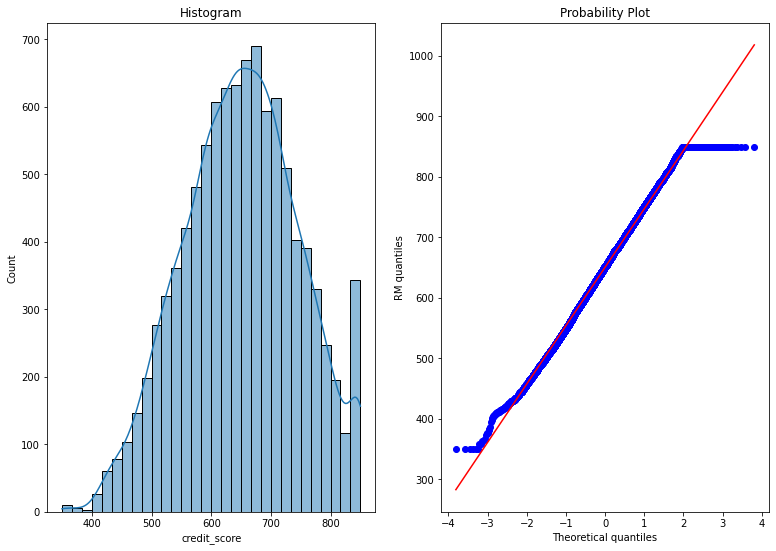

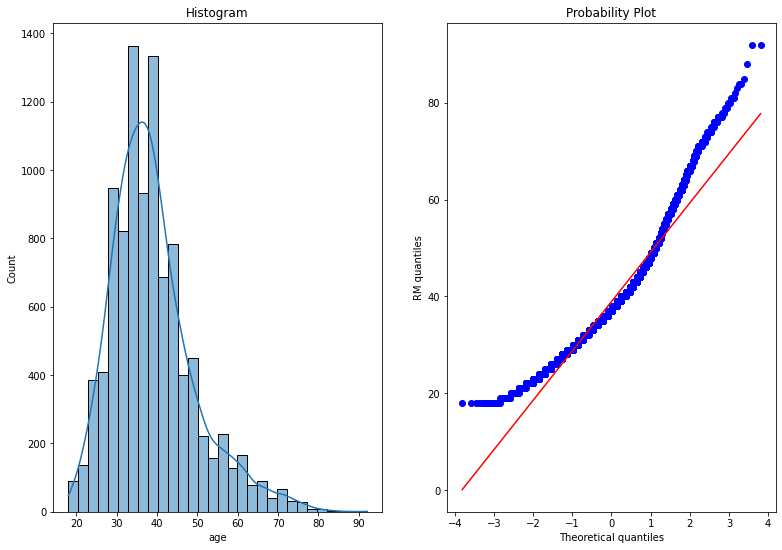

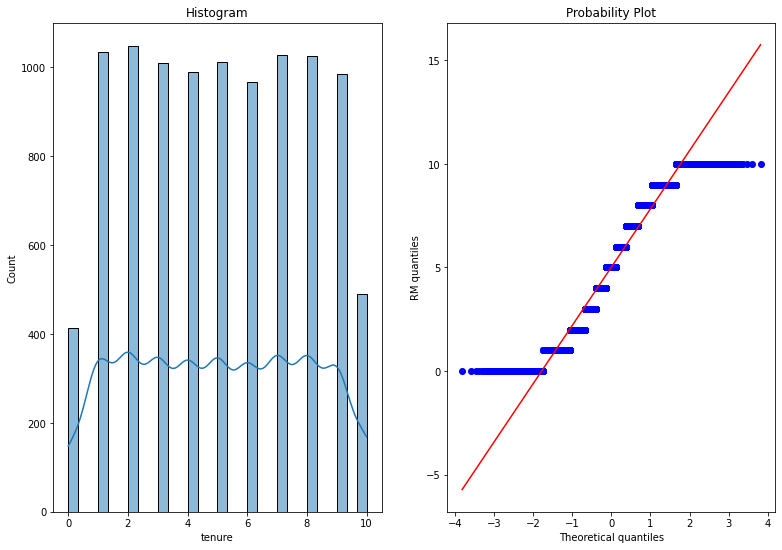

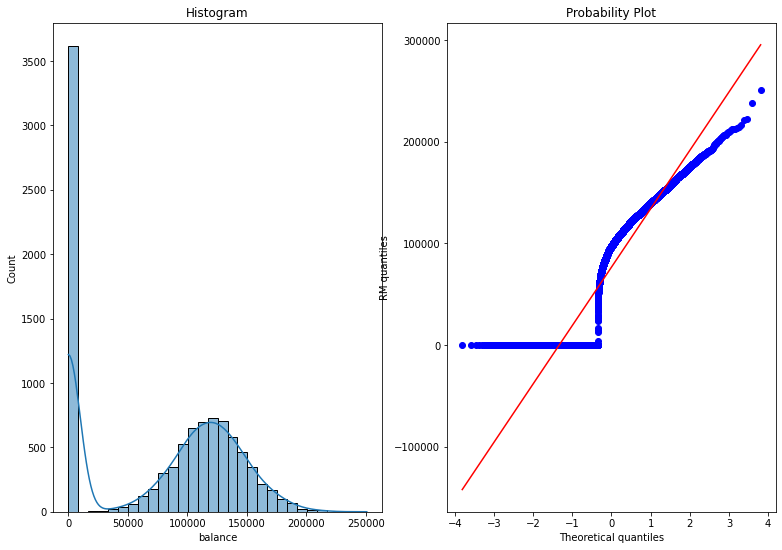

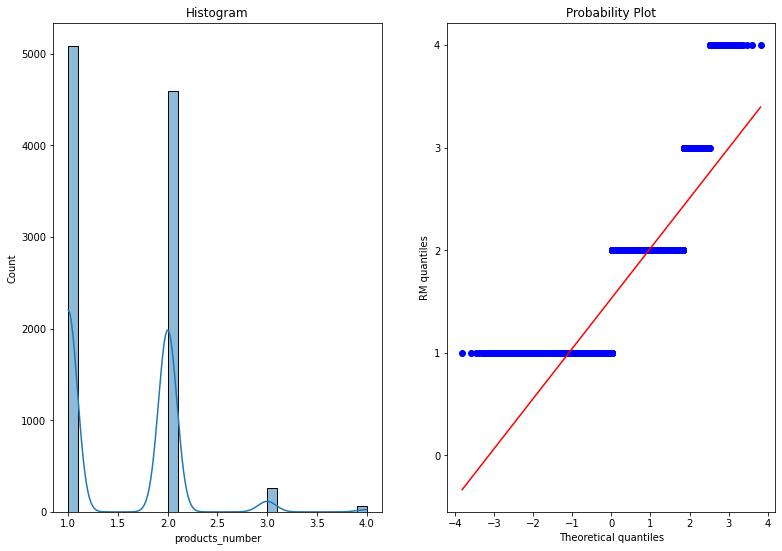

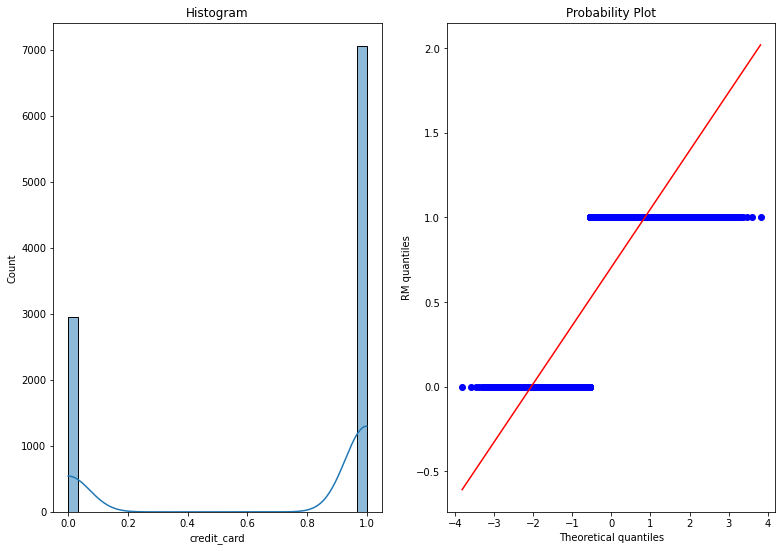

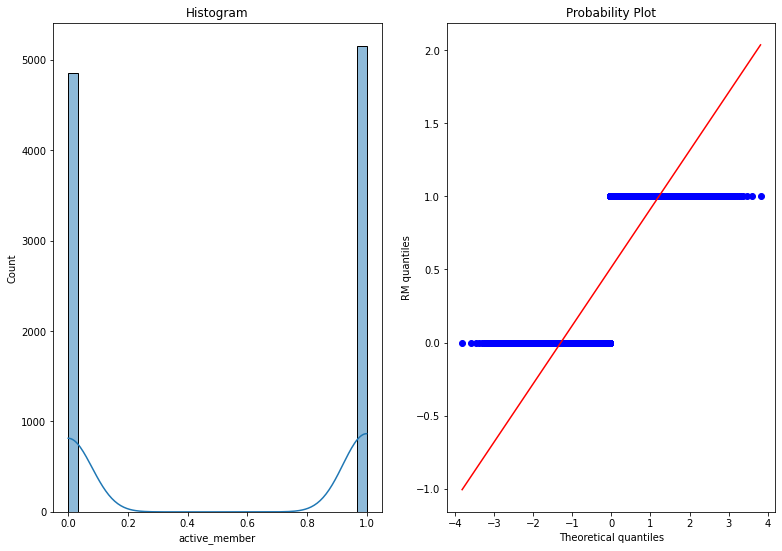

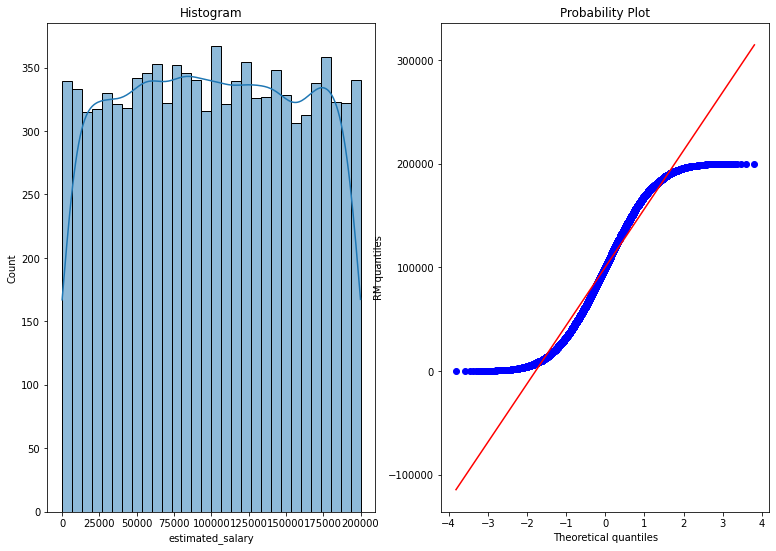

In [40]:
for i in num_columns:
    diagnostic_plots(df_dp,i)

Normalization : Data is not normally distributed hence one of the model assumption is violated.

3. **Is there any multicollinearity in the model?**

As per the Analytics Vidya multi collinearity is something which occurs when more than two independent variables are highly correlated to each other.

Multicollinearity can be determined through VIF which stands for Variance Inflation Factor.It signifies multicollinearity among set of different independent variable. A value greater than 10 means that the independent variable is highly correlated with some other variable. Will calculate VIF value for all variables to check the dependency and then will drop the variables with high VIF value.





In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
# VIF dataframe

#Compute VIF
vif = pd.DataFrame()
vif["variables"] = pdf.columns
vif["VIF"] = [variance_inflation_factor(pdf.values, i) for i in range(pdf.shape[1])]
vif

,variables,VIF
0,customer_id,82.125376
1,credit_score,46.350582
2,country,1.825875
3,gender,2.229543
4,age,16.408109
5,tenure,4.011769
6,balance,2.808082
7,products_number,8.752407
8,credit_card,3.398726
9,active_member,2.158396


VIF for 'age' and 'credit_score' is greater than 10 hence it is highly co-related with another variable. 

4. **In the multivariate models are predictor variables independent of all the other predictor variables?** 

We can tell if two random variables are independent by looking at their individual probabilities. If those probabilities don’t change when the events meet, then those variables are independent. Another way of saying this is that if the two variables are correlated, then they are not independent. 
So yes the variables are NOT independent in multivariate models.




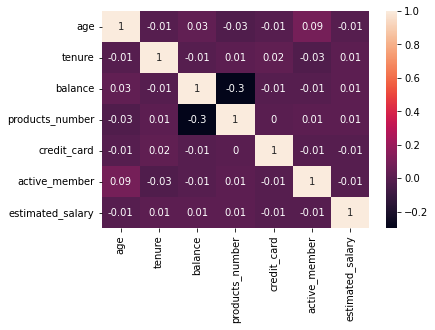

In [43]:
df_n=pd.read_csv("https://raw.githubusercontent.com/sripoojitha-mandali/DataSciEnggMethodsandTools/main/csv/Bank_Customer_Churn_Prediction.csv?token=GHSAT0AAAAAAB6AWSU6RNFAAWFIG5H7TYF2Y6UOZXQ")

df_n=df_n.iloc[:,2:-1]
cor_h2o=df_n.corr(method='pearson',min_periods=1).round(2)
sns.heatmap(cor_h2o, annot=True)
plt.show()

Few features are independent and some features are dependent on others based on heatmap shown. For examples `age` and `active_member` are slightly colinear.The same can be checked for `balance` and `product_number` with negative colinearity.


5. **In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model?**

The `varimp_plot()` a H2O.ai function that shows us the most significant predictor variable in a hierarchical manner and `age` is the most significant in this case followed by `product_number` and `balance` while `gender` and `tenure` project the least significance thereby can be excluded.

6. **Does the model make sense?**

Yes, the model makes sense. The test and validation error scores are significant with train set scores and Here the accuracy is 86%. 


ModelMetricsBinomial: gbm
** Reported on Validation data. **

- MSE: 0.10744691819522054
- RMSE: 0.3277909672264026
- LogLoss: 0.35261894456065573
- Mean Per-Class Error: 0.22668308702791462
- AUC: 0.8476737821565408
- AUCPR: 0.6794681635102396
- Gini: 0.6953475643130815

ModelMetricsBinomial: gbm
** Reported on test data. **

- MSE: 0.10319844172123241
- RMSE: 0.32124514272006105
- LogLoss: 0.33665769427340353
- Mean Per-Class Error: 0.23096646287435763
- AUC: 0.8662682194754563
- AUCPR: 0.6981123198576923
- Gini: 0.7325364389509126

7. **Does regularization help?**

Here model is not overfitted on test or validation data and it may not require regularization in this case.

##### **Ridge Regularization**

In [44]:
from sklearn.model_selection import  train_test_split

df_r=pd.read_csv("https://raw.githubusercontent.com/sripoojitha-mandali/DataSciEnggMethodsandTools/main/csv/Bank_Customer_Churn_Prediction.csv?token=GHSAT0AAAAAAB6AWSU6RNFAAWFIG5H7TYF2Y6UOZXQ")
X = df_r[['age','credit_score','tenure','balance','products_number','credit_card','active_member','estimated_salary']]
y = df_r['churn']

#Spliting data into Training 70%, Test set 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [45]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [46]:
from sklearn import metrics

# rmse after regularization
y_pred = ridge.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse


0.3782168773812506

no, the rmse from the best model is 0.32, however, in regularization, the rmse is 0.3782



8. **Which independent variables are significant?**

As per predictor signficance, all the features are significant except `credit_score` and `estimated_salary`. As per varimp_plot, `age` is the most important or significant feature to determine the target variable `churn` if the customer exists or is retained. The next significant feature is `product_number` and `balance`

9. **Which hyperparameters are important?**

max_models will let us see the number of models to be trained and display on the dataset , nfolds helps in mentioning the number of parts the dataset to be divided, exclude_algos are important by helping us not considering deep learning models if the data is not too complex, 

#### **Conclusion :**

The concluding remarks indicate that the H2O.ai auto ml library is functioning perfectly with the given dataset and producing accurate models. The notebook suggests that using the H2O library can lead to improved accuracy with minimal effort. However, the author believes that there is still room for improvement by manipulating the dataset and creating necessary functions that the library may not offer. Despite the small dataset size, adding more data could improve accuracy. The H2O library achieved a model accuracy of 86%, and the notebook explored the impact of regularization on the model, as well as which variables were important and directly related to each other.

### Refrences:

1. H2O.ai documentation https://docs.h2o.ai/h2o/latest-stable/h2o-docs/performance-and-prediction.html
2. H2O.ai notebook reference on a different dataset for classification https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/H2O_AutoML.ipynb#scrollTo=vOxeivTyUCeq
3. H2O.ai model explainability https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html
4. Confusion metrics https://en.wikipedia.org/wiki/Confusion_matrix

**All other code and function implementation are independently written.**


Copyright 

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.